# 🔥 **SIT742 Task2 - Team 25 - End term Assignment**

# **Team Project**

## ➡️ **Student 1** Details
### 🪪 Student ID: **S224567866**
### 👦🏻 Student Name: **V T Vishwanath**

## ➡️ **Student 2** Details
### 🪪 Student ID: **S224670082**
### 👦🏻 Student Name: **Visruth TM**

## ➡️ **Student 3** Details
### 🪪 Student ID: **S224674785**
### 👧🏻 Student Name: **Bala Trivali Ranga**


## ⚡ Attempt High Distinction Question: **Yes**

## ➡️ **Instructions**
### **Assignment Questions**

### There are total **2** parts in the assessment task 2:
- **Part 1** The first part will focus on the data manipulation and pyspark skills which includes the Data Acquisition, the Data Wrangling, the EDA and Spark, the modules and library from **M03**, **M04**.
- **Part 2** The second part focus on more advanced data science skills with particular scenario. This part will require the knowledge covered in **M05**.

### **What to Submit?**

There is no optional part for assignment 2. You and your group are required to submit the following completed files to the corresponding Assignment on Olympus:

SIT742Task2.ipynb The completed notebook with all the run-able code for all requirements (part 1 and part2).

In general, you (your group) need to complete, save the results of running, download/export the
notebook as a local file, and submit your notebook from Python platform such as Google Colab. You need to clearly list the answer for each question, and the expected format from your **notebook** will be like in Figure 1 (**One notebook** for each group).

**Figure 1: Notebook Format**
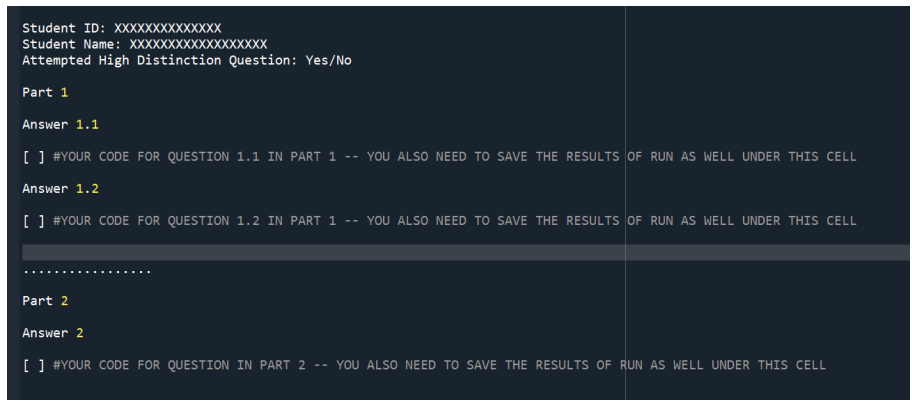

SIT742Task2report.pdf You (group) are also required to write a report with your answer (code) and running results from SIT742Task2.ipynb for all the questions (Part 1 and Part 2).

You could make screenshot on
your answer (code) and running results from SIT742Task2.ipynb and paste into the report. Please try to include the code comments, and results including plot images as well in the report, and make sure the code format such as Indentation keeps same as the ipynb notebook.

In this report (one for each group), you will also need to provide a clear explanation on your logic for solving each question (you could write an explanation below your solution and results in the report).

In the explanation, you will need to cover below parts:
- 1). why you decide to choose your solution;
- 2). are there any other solutions that could solve the question;
- 3). whether your solution is the optimal or not? why? The length of the explanation part for each question is limited below 100
words

In the end of your report, you (group) also need to discuss below three points:
- How you and your team member collaborate on this assignment?
- What you have learned with your team member from the second assignment.
- What is the contribution of each the team member for finishing the second assignment

SIT742Task2video.avi A video demonstration between 10 and 15 minutes, and the file format can be any common video format, such as ‘MKV’, ‘WMV’, ‘MOV’ etc.

For your group, one important submission is a **short video** in which each of You (group members) orally present the solutions that you provide in the notebook and illustrate the running of code with the used logic. In the video, your group need to work together to discuss below three points:
- Which question(s) you have worked on and how did you collaborate with other team members.
- What is the logic behind the your solution on the question(s)? and is there any alternative optimized ways to resolve the question?
- What is your understanding of Code collaboration? How do you collaborate with your group in coding? What are the common tools/platform to support the Code collaboration?



# ✴️ **Part 1**
# 🗃️ **Data Acquisition and Manipulation**

There are **10** questions in this part, totalling **60** marks. Each of question is worth **5** marks. Additionally, the quality of your explanation in both the report and video will collectively be worth **10** marks.

You are recommended to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.

The (transactionrecord.zip) data used for this part could be found in **here**. You will need to use spark to read the unzipped (csv) data for starting. You could find the code on reading csv data with Spark from M04G.


## ➡️ **Question 1.1**
Using PySpark to do some of the data wrangling process, so that:

### ⚡ 1.1.1 For the ’NA’ in CustomerNo columns, change it to ’-1’.

In [1]:
# Installing the libarries
!pip install pyspark

In [2]:
# Importing the required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, regexp_replace
from pyspark.sql.functions import col, regexp_extract, sum, to_date
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc
from typing_extensions import overload
import matplotlib.dates as mdates

In [3]:
# Initialize SparkSession
spark = SparkSession.builder.appName("TransactionRecord").getOrCreate()

In [4]:
# Assuming the transactionrecord.gz file contains a csv file like transactionrecord.csv,
df = spark.read.csv('transactionrecord.gz', header=True, inferSchema=True)

In [5]:
# Displying few records of the dataframe
df.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

In [6]:
# Check the size and shapeof the df
print((df.count(), len(df.columns)))

(536350, 9)


💡 We have total of 5,36,350 records and 9 Columns

In [7]:
# Create a function to count nulls in each column
def count_nulls(df):
    return df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

In [8]:
# Get null count for each column
null_counts = count_nulls(df)
null_counts.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|            0|   0|        0|          0|               0|    0|       0|         0|      0|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



💡 We dont see `null` values in the dataframe with the default data types.

In [9]:
# Display records with 'NA' values in CustomerNo
df_na_customers = df.filter(df['CustomerNo'].isNull())
df_na_customers.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



💡 We dont see any `null` or `NA` values in the `CustomerNo` column with default data type.

In [10]:
# Checking the data type of each columns
df.dtypes

[('TransactionNo', 'string'),
 ('Date', 'string'),
 ('ProductNo', 'string'),
 ('ProductName', 'string'),
 ('Product_category', 'string'),
 ('Price', 'double'),
 ('Quantity', 'int'),
 ('CustomerNo', 'int'),
 ('Country', 'string')]

In [11]:
# Selecting only positive integers from the `CustomerNo` columns (removing values e.g., 'NA', 'N/A', negative numbers)
df = df.withColumn("CustomerNo", regexp_extract(col("CustomerNo"), "^[0-9]+$", 0))

In [12]:
# Converting the `CustomerNo` COlumn to `int` data type
df = df.withColumn("CustomerNo", col("CustomerNo").cast("int"))

In [13]:
# Get null count for each column
null_counts = count_nulls(df)
null_counts.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|            0|   0|        0|          0|               0|    0|       0|        55|      0|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



💡 Now we can see around 55 records having `null` values this is because we used the pattern matchong and value snot matched by pattern matching became `null`.

In [14]:
# Display records with `NA`/`NULL` values in CustomerNo
df_na_customers = df.filter(df['CustomerNo'].isNull())
df_na_customers.show()

+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|      C581406| 12/8/2019|   46000M|Polyester Filler ...|             0ca| 6.19|    -240|      NULL|United Kingdom|
|      C581406| 12/8/2019|   46000S|Polyester Filler ...|             0ca| 6.19|    -300|      NULL|United Kingdom|
|      C575153| 11/8/2019|    22947|Wooden Advent Cal...|             0ca|44.25|      -1|      NULL|United Kingdom|
|      C574288| 11/3/2019|    22178|Victorian Glass H...|             0ca|25.37|      -1|      NULL|United Kingdom|
|      C573180|10/28/2019|    23048|Set Of 10 Lantern...|             0ca| 14.5|      -1|      NULL|United Kingdom|
|      C569495| 10/4/2019|    21843|Red Retrospot Cak...|             0c

In [15]:
# Count of Invalid Customers
df_na_customers.count()

55

In [16]:
# Display records with 'NA' values in CustomerNo
df_na_customers = df.filter(df['CustomerNo'].isNull())
df_na_customers.show(df_na_customers.count())

+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|      C581406| 12/8/2019|   46000M|Polyester Filler ...|             0ca| 6.19|    -240|      NULL|United Kingdom|
|      C581406| 12/8/2019|   46000S|Polyester Filler ...|             0ca| 6.19|    -300|      NULL|United Kingdom|
|      C575153| 11/8/2019|    22947|Wooden Advent Cal...|             0ca|44.25|      -1|      NULL|United Kingdom|
|      C574288| 11/3/2019|    22178|Victorian Glass H...|             0ca|25.37|      -1|      NULL|United Kingdom|
|      C573180|10/28/2019|    23048|Set Of 10 Lantern...|             0ca| 14.5|      -1|      NULL|United Kingdom|
|      C569495| 10/4/2019|    21843|Red Retrospot Cak...|             0c

In [17]:
# Replace `NA`/`NULL` in CustomerNo with -1
df = df.fillna({'CustomerNo': -1})

In [18]:
# Get null count for each column
null_counts = count_nulls(df)
null_counts.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|            0|   0|        0|          0|               0|    0|       0|         0|      0|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



In [19]:
# Display records with 'NA' values in CustomerNo
df_na_customers = df.filter(df['CustomerNo'].isNull())
df_na_customers.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



In [20]:
# Convert columns to appropriate types
df = df.withColumn("Price", col("Price").cast("float"))
df = df.withColumn("Quantity", col("Quantity").cast("int"))
df = df.withColumn("CustomerNo", col("CustomerNo").cast("int"))

In [21]:
# Handle Date column
df = df.withColumn("Date", to_date(col("Date"), 'M/d/yyyy'))

In [22]:
# Remove duplicate rows
df = df.dropDuplicates()

In [23]:
# Remove invalid transactions (Quantity <= 0)
#df = df.filter(col("Quantity") > 0)
# This step is part of the questions we will be doing it later

In [24]:
# Data Exploration and EDA

# Basic statistics
df.describe(['Price', 'Quantity']).show()

+-------+-----------------+-----------------+
|summary|            Price|         Quantity|
+-------+-----------------+-----------------+
|  count|           531150|           531150|
|   mean|12.66978713040162|9.988539960463147|
| stddev|8.525987680058789| 217.700768247739|
|    min|             5.13|           -80995|
|    max|           660.62|            80995|
+-------+-----------------+-----------------+



In [25]:
# Count distinct values
df.select("TransactionNo").distinct().count()
df.select("ProductNo").distinct().count()
df.select("CustomerNo").distinct().count()
df.select("Country").distinct().count()

38

In [26]:
# Top 10 most popular products

df.groupBy("ProductName").count().orderBy(desc("count")).show(10)

+--------------------+-----+
|         ProductName|count|
+--------------------+-----+
|Cream Hanging Hea...| 2366|
|Regency Cakestand...| 2190|
|Jumbo Bag Red Ret...| 2156|
|       Party Bunting| 1720|
|Lunch Bag Red Ret...| 1626|
|Assorted Colour B...| 1488|
|      Popcorn Holder| 1469|
|Set Of 3 Cake Tin...| 1465|
|Pack Of 72 Retros...| 1367|
|Lunch Bag Suki De...| 1328|
+--------------------+-----+
only showing top 10 rows



In [27]:
# Total sales per product (Price * Quantity)
df = df.withColumn("TotalSales", col("Price") * col("Quantity"))
df.groupBy("ProductName").sum("TotalSales").orderBy(desc("sum(TotalSales)")).show(10)

+--------------------+------------------+
|         ProductName|   sum(TotalSales)|
+--------------------+------------------+
|      Popcorn Holder| 583075.2303462029|
|World War 2 Glide...|  556157.648182869|
|Paper Craft Littl...|       501359.0625|
|Cream Hanging Hea...|451163.72823667526|
|Assorted Colour B...| 419557.6646461487|
|Pack Of 72 Retros...| 388180.6685872078|
|  Rabbit Night Light|327293.82327604294|
|Jumbo Bag Red Ret...|289853.95102500916|
|Regency Cakestand...|288752.32519960403|
|Mini Paint Set Vi...| 284870.9199476242|
+--------------------+------------------+
only showing top 10 rows



In [28]:
# Top 10 customers by total purchase value
df.groupBy("CustomerNo").sum("TotalSales").orderBy(desc("sum(TotalSales)")).show(10)

+----------+-----------------+
|CustomerNo|  sum(TotalSales)|
+----------+-----------------+
|     14646|2108959.942278862|
|     18102|897137.3566436768|
|     12415|895267.2398605347|
|     17450|876447.0030593872|
|     14911| 872608.570432663|
|     14156|683106.7684731483|
|     14298| 633533.191403389|
|     13694|631971.9807958603|
|     17511|627685.4098978043|
|     16684|  518976.77709198|
+----------+-----------------+
only showing top 10 rows



In [29]:
# Country-wise sales
df.groupBy("Country").sum("TotalSales").orderBy(desc("sum(TotalSales)")).show()

+---------------+--------------------+
|        Country|     sum(TotalSales)|
+---------------+--------------------+
| United Kingdom|4.9837557940739155E7|
|    Netherlands|  2147811.3824472427|
|           EIRE|   1659053.509153843|
|        Germany|  1348561.7496728897|
|         France|   1316144.747912407|
|      Australia|    988562.449757576|
|         Sweden|   396042.6174736023|
|    Switzerland|  358146.32089948654|
|          Japan|   283293.4696793556|
|        Belgium|   271346.9803767204|
|          Spain|  265570.33093881607|
|         Norway|  187544.79080820084|
|       Portugal|  175118.33013629913|
|        Finland|  120597.86114120483|
|        Denmark|  100439.11999702454|
|Channel Islands|   95783.18988466263|
|          Italy|   77397.21999073029|
|        Austria|   68548.30023860931|
|      Singapore|  63480.949977874756|
|         Cyprus|   61499.82038784027|
+---------------+--------------------+
only showing top 20 rows



In [30]:
# Sales trends by Date
df.groupBy("Date").sum("TotalSales").orderBy("Date").show()

+----------+------------------+
|      Date|   sum(TotalSales)|
+----------+------------------+
|2018-12-01|323387.09763383865|
|2018-12-02|259513.53484869003|
|2018-12-03| 201526.6683192253|
|2018-12-05|194145.77888774872|
|2018-12-06| 268615.9275598526|
|2018-12-07|   336006.89691782|
|2018-12-08| 265011.4198989868|
|2018-12-09|246787.16919708252|
|2018-12-10|260960.78796339035|
|2018-12-12|124066.66944646835|
|2018-12-13|217484.78942728043|
|2018-12-14| 240509.8305940628|
|2018-12-15|217247.16093730927|
|2018-12-16| 344585.1995019913|
|2018-12-17|201726.12018299103|
|2018-12-19|45355.009531497955|
|2018-12-20|167541.14790916443|
|2018-12-21| 197168.7098555565|
|2018-12-22|37131.170179367065|
|2018-12-23| 68425.88948726654|
+----------+------------------+
only showing top 20 rows



In [31]:
# Save the cleaned DataFrame if needed
df.write.mode("overwrite").csv("cleaned_transaction_data.csv", header=True)

### ⚡ 1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows

In [32]:
# Process the text in productName column, only alphabet characters left
df = df.withColumn("productName_process", regexp_replace("productName", "[^a-zA-Z]", ""))

In [33]:
# Show the first 5 rows
#df.select("productName", "productName_process").show(5)
df.show(5)

+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+----------+--------------------+
|TransactionNo|      Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|TotalSales| productName_process|
+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+----------+--------------------+
|       581492|2019-12-09|    23565|Egg Cup Milkmaid ...|             0ca| 6.19|       2|     15492|United Kingdom|     12.38| EggCupMilkmaidHelga|
|       581492|2019-12-09|    21065|Boom Box Speaker ...|             0ca| 6.19|       2|     15492|United Kingdom|     12.38| BoomBoxSpeakerGirls|
|       581492|2019-12-09|    22576|Swallow Wooden Ch...|             0ca| 7.24|       3|     15492|United Kingdom|     21.72|SwallowWoodenChri...|
|       581492|2019-12-09|    22616|Pack Of 12 London...|             0ca| 6.19|       1|     15492|United Kingd

## ➡️ **Question 1.2**
Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done:

### ⚡ 1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.


In [34]:
# Calculate revenue and save it as a float
df = df.withColumn("Revenue", col("price").cast("float") * col("Quantity").cast("float"))

In [35]:
# Show the top 5 rows
df.show(5)

+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+----------+--------------------+-------+
|TransactionNo|      Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|TotalSales| productName_process|Revenue|
+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+----------+--------------------+-------+
|       581492|2019-12-09|    23565|Egg Cup Milkmaid ...|             0ca| 6.19|       2|     15492|United Kingdom|     12.38| EggCupMilkmaidHelga|  12.38|
|       581492|2019-12-09|    21065|Boom Box Speaker ...|             0ca| 6.19|       2|     15492|United Kingdom|     12.38| BoomBoxSpeakerGirls|  12.38|
|       581492|2019-12-09|    22576|Swallow Wooden Ch...|             0ca| 7.24|       3|     15492|United Kingdom|     21.72|SwallowWoodenChri...|  21.72|
|       581492|2019-12-09|    22616|Pack Of 12 London...|       

### ⚡ 1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.


In [36]:
# Convert PySpark DataFrame to Pandas DataFrame
df_spark = df
df = df.toPandas()

# Stop SparkSession
spark.stop()

In [37]:
# Save the df to csv file in pandas with header
df.to_csv('transactionrecord.csv', index=False, header=True)

In [38]:
# Save the df to csv file in pandas with header with first 10000 records
df.head(10000).to_csv('transactionrecord_10k.csv', index=False, header=True)

In [39]:
# Convert 'Date' column to datetime objects
df['transaction_date'] = pd.to_datetime(df['Date'])

In [40]:
# Print the top 5 rows of the Pandas DataFrame
df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,TotalSales,productName_process,Revenue,transaction_date
0,581492,2019-12-09,23565,Egg Cup Milkmaid Helga,0ca,6.19,2,15492,United Kingdom,12.380000,EggCupMilkmaidHelga,12.380000,2019-12-09
1,581492,2019-12-09,21065,Boom Box Speaker Girls,0ca,6.19,2,15492,United Kingdom,12.380000,BoomBoxSpeakerGirls,12.380000,2019-12-09
2,581492,2019-12-09,22576,Swallow Wooden Christmas Decoration,0ca,7.24,3,15492,United Kingdom,21.719999,SwallowWoodenChristmasDecoration,21.719999,2019-12-09
3,581492,2019-12-09,22616,Pack Of 12 London Tissues,0ca,6.19,1,15492,United Kingdom,6.190000,PackOfLondonTissues,6.190000,2019-12-09
4,581497,2019-12-09,22895,Set Of 2 Tea Towels Apple And Pears,0ca,7.24,1,17497,United Kingdom,7.240000,SetOfTeaTowelsAppleAndPears,7.240000,2019-12-09


### ⚡ 1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?

In [41]:
# Group by transaction_date and calculate the sum of revenue
revenue_by_date = df.groupby('transaction_date')['Revenue'].sum()

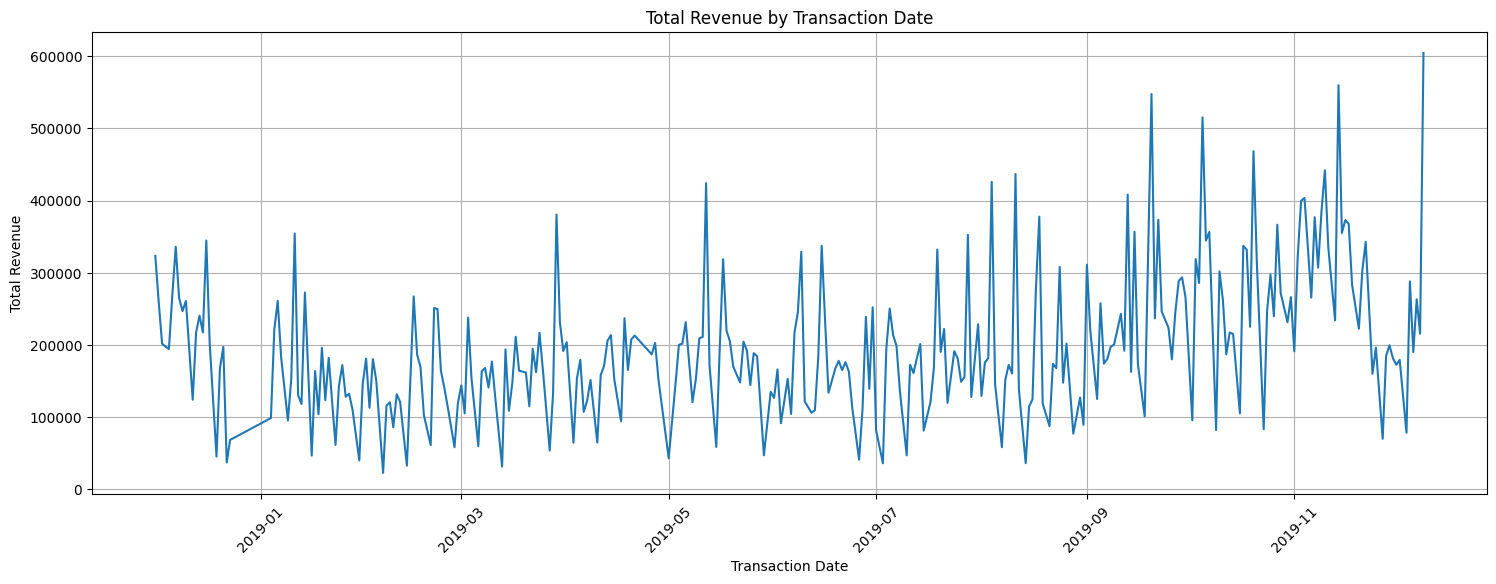

In [42]:
# Increase figure size horizontally (adjust width as needed)
plt.figure(figsize=(18, 6))  # Width increased from 12 to 18

# Plot the data with x-axis labels (consider fewer labels for better readability)
plt.plot(revenue_by_date.index, revenue_by_date.values)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many labels

# Labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Transaction Date')

# Grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

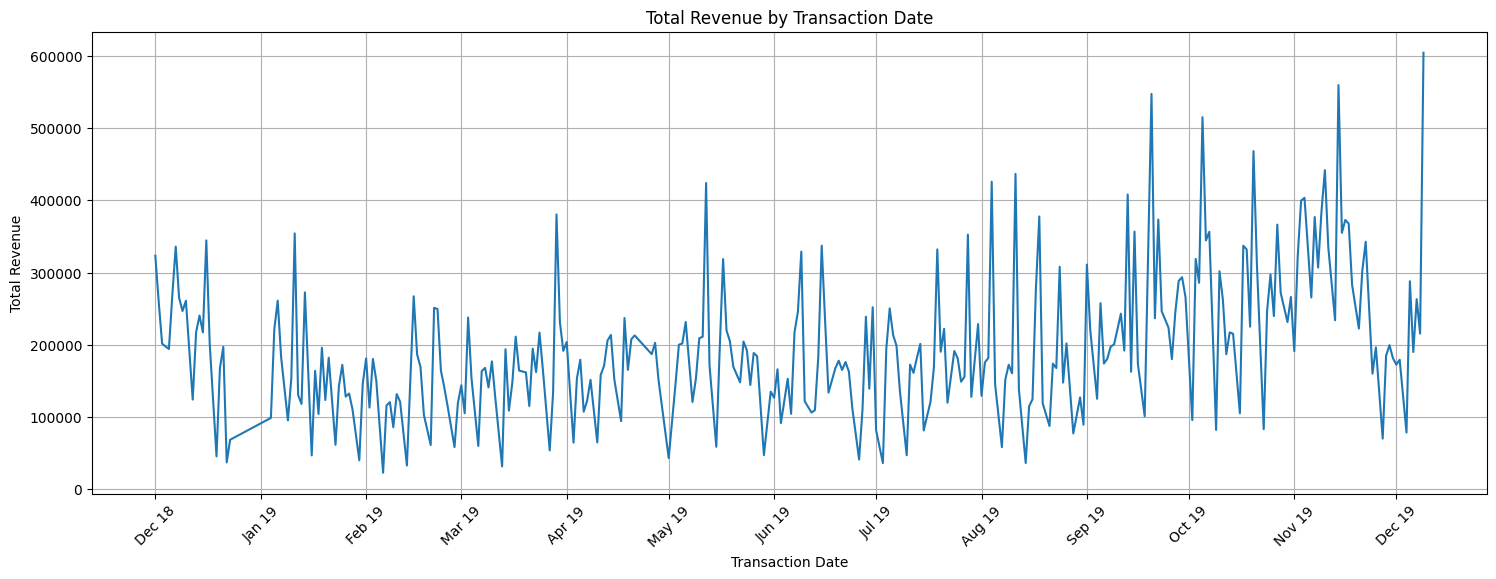

In [43]:
# Increase figure size horizontally (adjust width as needed)
plt.figure(figsize=(18, 6))

# Plot the data
plt.plot(revenue_by_date.index, revenue_by_date.values)

# Set x-axis labels to monthly intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format labels as 'Jan 24'

# Labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Transaction Date')

# Grid for better visualization
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

💡 Findings are, in Jan 2019 Month we have sudden increase in orders and revenue, also in the December 2019 month sudden in crease in revenue, This indicates the some specilal events like Christmas and other festivals and customers are buying more.

## ➡️ **Question 1.3**
Let’s continue to analyse on the transaction_date vs revenue.

### ⚡ 1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a  line chart with workday on averaged revenues).

In [44]:
# Convert 'transaction_date' to day of the week (Monday=0, Sunday=6)
#df['day_of_week'] = df['transaction_date'].dt.dayofweek
df['day_of_week'] = df['transaction_date'].dt.day_name()

In [45]:
# Group by day of the week and calculate the average revenue
average_revenue_by_day = df.groupby('day_of_week')['Revenue'].mean()

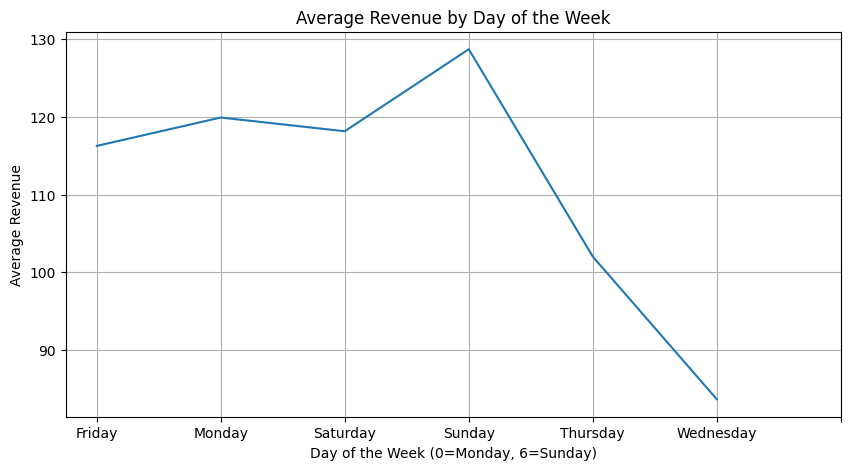

In [46]:
# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(average_revenue_by_day.index, average_revenue_by_day.values)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Day of the Week')
plt.xticks(range(7))  # Ensure all days are shown on the x-axis
plt.grid(True)
plt.show()


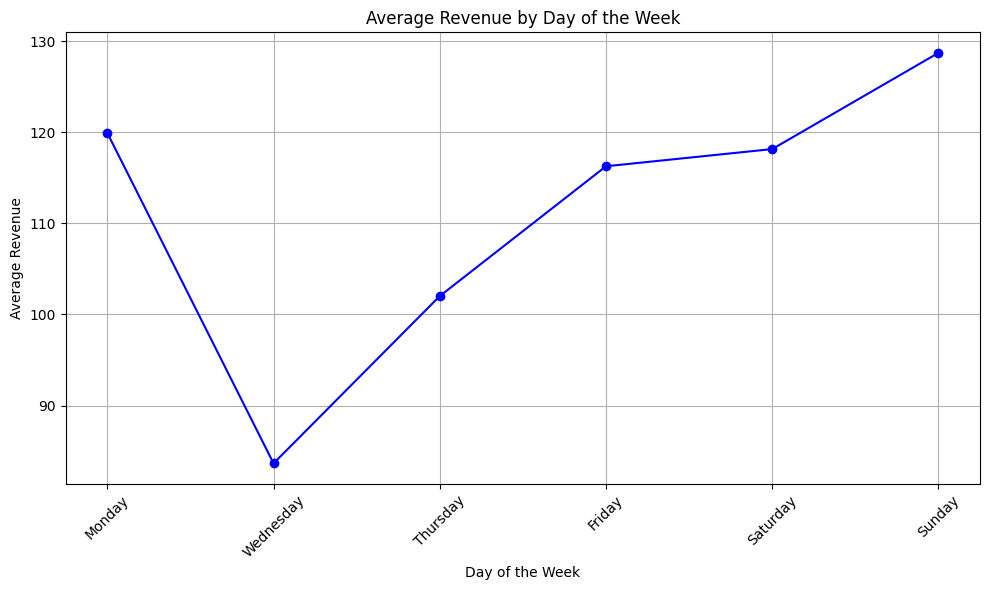

In [47]:
average_revenue_per_day = df.groupby('day_of_week')['Revenue'].mean()

# Sorting the days of the week to ensure proper order
# Assuming 'day_of_week' contains day names like 'Monday', 'Tuesday', etc.
ordered_days = ['Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_revenue_per_day = average_revenue_per_day.reindex(ordered_days)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_revenue_per_day.index, average_revenue_per_day.values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Average Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

❓
- Group by day_of_week: We group the data by the 'day_of_week' column and compute the average revenue for each day.
- Reindex to maintain order: We ensure that the days are ordered correctly from Monday to Sunday.
- Plotting: A line chart is generated where the x-axis represents the day of the week and the y-axis represents the average revenue.

💡 From the above graph its clear that we have high sales on Sundays which is a holidy and people shop more on this day of the week.

### ⚡ 1.3.2 Identify the name of product (column productName_process) that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).

In [48]:
# Step 1: Find the workday with the highest average revenue (from 1.3.1)
highest_avg_revenue_day = average_revenue_per_day.idxmax()

In [49]:
# Step 2: Filter the dataframe for that specific workday
df_filtered = df[df['day_of_week'] == highest_avg_revenue_day]

In [50]:
# Step 3: Find the product that contributes the highest revenue on that workday
product_highest_revenue = df_filtered.groupby('productName_process')['Revenue'].sum().idxmax()
highest_revenue_value = df_filtered.groupby('productName_process')['Revenue'].sum().max()

In [51]:
# Step 4: Find the product with the highest sales volume (sum of Quantity) on that workday
product_highest_sales_volume = df_filtered.groupby('productName_process')['Quantity'].sum().idxmax()
highest_sales_volume_value = df_filtered.groupby('productName_process')['Quantity'].sum().max()

In [52]:
# Results
print(f"Workday with the highest average revenue: {highest_avg_revenue_day}")
print(f"Product contributing the highest revenue: {product_highest_revenue} with revenue: {highest_revenue_value}")
print(f"Product with the highest sales volume: {product_highest_sales_volume} with sales volume: {highest_sales_volume_value}")

Workday with the highest average revenue: Sunday
Product contributing the highest revenue: WorldWarGlidersAsstdDesigns with revenue: 187081.34375
Product with the highest sales volume: WorldWarGlidersAsstdDesigns with sales volume: 18051


❓
- highest_avg_revenue_day: This gets the day of the week that generated the highest average revenue.
- df_filtered: Filters the DataFrame to include only the rows for that day.
- product_highest_revenue: This groups the data by productName_process and finds the product with the maximum sum of Revenue for that day.
- product_highest_sales_volume: This groups by productName_process and finds the product with the maximum sum of Quantity (sales volume) for that day.

💡 Workday with the highest average revenue is Sunday.

💡 WorldWarGlidersAsstdDesigns is the product with highest revenue of 187081.34 with quantity 18051 sold on sunday.

### ⚡ 1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general

In [53]:
# Step 1: Find the top 5 products by highest revenue
top_5_revenue_products = df.groupby('productName_process')['Revenue'].sum().nlargest(5)
top_5_revenue_products

,Revenue
productName_process,
PopcornHolder,583075.25000
WorldWarGlidersAsstdDesigns,556157.62500
PaperCraftLittleBirdie,501359.06250
CreamHangingHeartTLightHolder,451163.71875
AssortedColourBirdOrnament,419557.65625


In [54]:
# Step 2: Find the top 5 products by highest sales volume (Quantity)
top_5_sales_volume_products = df.groupby('productName_process')['Quantity'].sum().nlargest(5)
top_5_sales_volume_products

,Quantity
productName_process,
PopcornHolder,56431
WorldWarGlidersAsstdDesigns,53751
JumboBagRedRetrospot,47260
AssortedColourBirdOrnament,36346
PackOfRetrospotCakeCases,36208


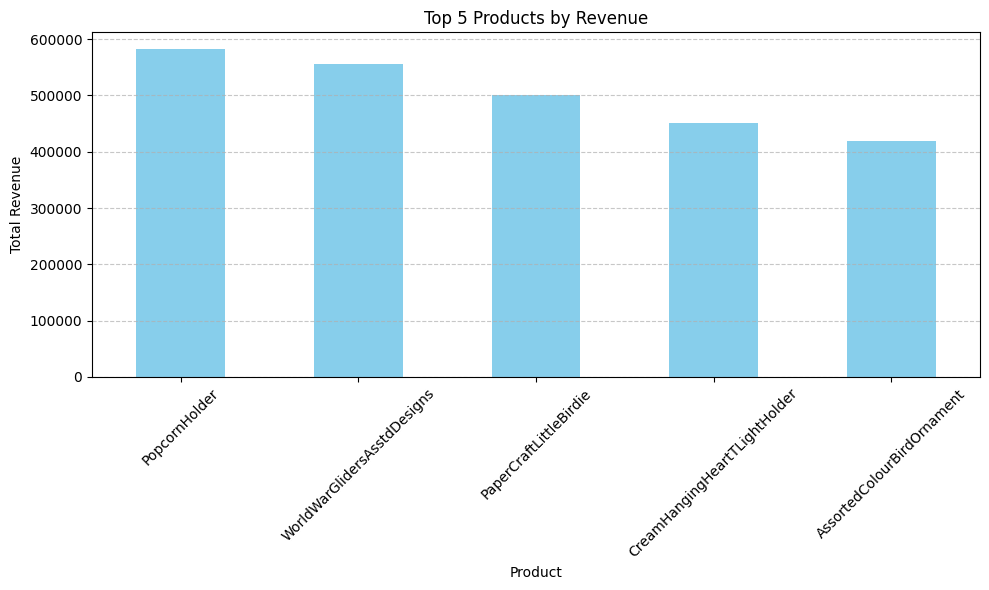

In [55]:
# Plotting the top 5 products by revenue
plt.figure(figsize=(10, 6))
top_5_revenue_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot for top 5 products by revenue
plt.show()

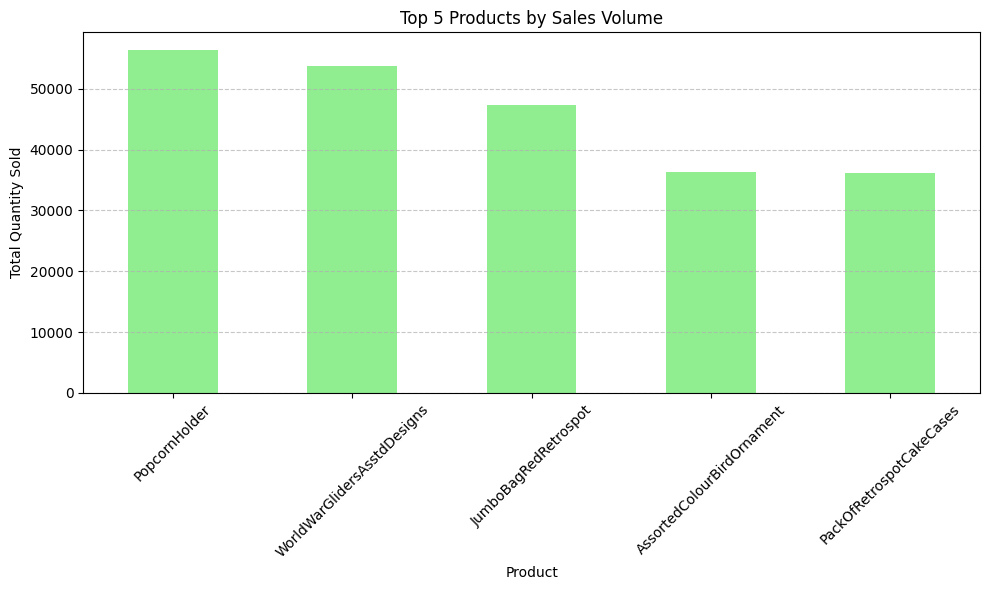

In [56]:
# Plotting the top 5 products by sales volume
plt.figure(figsize=(10, 6))
top_5_sales_volume_products.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot for top 5 products by sales volume
plt.show()

❓ **Group by productName_process and aggregate:**
- Top 5 products by revenue: Using .nlargest(5) to find the top 5 products based on the total revenue.
- Top 5 products by sales volume: Similarly, finding the top 5 products based on the sum of the Quantity.

❓ **Plotting:**
- Revenue Plot: Bar chart showing the top 5 products by total revenue.
- Sales Volume Plot: Bar chart showing the top 5 products by total sales volume (quantity).

💡 The top 5 products that contribute the highest revenues in general are
- PopcornHolder with 583075.25000 in revenue
- WorldWarGlidersAsstdDesigns	with 556157.62500 in revenue
- PaperCraftLittleBirdie	with 501359.06250 in revenue
- CreamHangingHeartTLightHolder	with 451163.71875 in revenue
- AssortedColourBirdOrnament	with 419557.65625 in revenue

💡 Top 5 products that have the highest sales volumes in general are
- PopcornHolder	with 56431 quantity
- WorldWarGlidersAsstdDesigns	with 53751 quantity
- JumboBagRedRetrospot	with 47260 quantity
- AssortedColourBirdOrnament	with 36346 quantity
- PackOfRetrospotCakeCases	with 36208 quantity

## ➡️ **Question 1.4**
### ⚡ Which country generates the highest revenue? Additionally, identify the month in that country that has the highest revenue.

In [57]:
# Step 1: Find the country that generates the highest total revenue
highest_revenue_country = df.groupby('Country')['Revenue'].sum().idxmax()
highest_revenue_value = df.groupby('Country')['Revenue'].sum().max()


In [58]:
# Step 2: Filter the data for that country
df_country = df[df['Country'] == highest_revenue_country]

In [59]:
# Step 3: Extract the month from the 'transaction_date' column
df_country['Month'] = df_country['transaction_date'].dt.strftime('%Y-%m')

<ipython-input-59-e337000bf669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Month'] = df_country['transaction_date'].dt.strftime('%Y-%m')


In [60]:
# Step 4: Find the month that generates the highest revenue in that country
highest_revenue_month = df_country.groupby('Month')['Revenue'].sum().idxmax()
highest_revenue_month_value = df_country.groupby('Month')['Revenue'].sum().max()

In [61]:
# Results
print(f"Country with the highest revenue: {highest_revenue_country} with revenue: {highest_revenue_value}")
print(f"Month with the highest revenue in {highest_revenue_country}: {highest_revenue_month} with revenue: {highest_revenue_month_value}")

Country with the highest revenue: United Kingdom with revenue: 49837556.0
Month with the highest revenue in United Kingdom: 2019-11 with revenue: 6705961.5


❓
- Group the data by Country and sum the Revenue to find the country with the highest total revenue using .idxmax() to get the country name and .max() to get the revenue value.
- Filter data for that country: Filter the original DataFrame for transactions that occurred in the highest-revenue country.
- Extract the month: Extract the month (in "YYYY-MM" format) from the transaction_date column to group the data by month.
- Month with the highest revenue: Group the filtered data by Month and sum the Revenue to find the month that generated the highest revenue.

💡 Country with the highest revenue is United Kingdom with revenue 49837556.0

💡 Month with the highest revenue in United Kingdom is 2019-11 i,e November 2019 with revenue 6705961.5

## ➡️ **Question 1.5**
### ⚡ Let’s do some analysis on the CustomerNo and their transactions. Determine the shopping frequency of  customers to identify who shops most frequently (find out the highest distinct count of transactionNo on customer level, be careful with those transactions that is not for shopping – filter those transaction quantity <= 0). Also, find out what products (column productName_process) ‘this customer’ typically buys based on the Quantity of products purchased.

In [62]:
# Step 1: Filter out transactions where Quantity <= 0 (non-shopping transactions)
df_filtered_shopping = df[df['Quantity'] > 0]

In [63]:
# Step 2: Group by CustomerNo and count distinct TransactionNo for each customer
customer_shopping_frequency = df_filtered_shopping.groupby('CustomerNo')['TransactionNo'].nunique()

In [64]:
# Step 3: Identify the customer with the highest shopping frequency (most distinct transactions)
most_frequent_customer = customer_shopping_frequency.idxmax()
highest_shopping_frequency = customer_shopping_frequency.max()

In [65]:
# Step 4: Filter data for 'this customer' (most frequent customer)
df_most_frequent_customer = df_filtered_shopping[df_filtered_shopping['CustomerNo'] == most_frequent_customer]

In [66]:
# Step 5: Find out the products typically bought by this customer based on Quantity
# Group by productName_process and sum the Quantity of products purchased
products_bought_by_customer = df_most_frequent_customer.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False)

In [67]:
# Results
print(f"The customer who shops most frequently (CustomerNo): {most_frequent_customer} with {highest_shopping_frequency} distinct transactions.")
print(f"Products typically bought by this customer (based on Quantity):\n{products_bought_by_customer}")

The customer who shops most frequently (CustomerNo): 12748 with 207 distinct transactions.
Products typically bought by this customer (based on Quantity):
productName_process
VictorianMetalPostcardSpring     595
RoseScentCandleJewelledDrawer    408
CartoonPencilSharpeners          405
SmallWhiteRetrospotMugInBox      390
WorldWarGlidersAsstdDesigns      384
                                ... 
SandwichBathSponge                 1
FryingPanBluePolkadot              1
RedRetrospotWashbag                1
FuschiaVoilePointyShoeDec          1
dVintageChristmasStickers          1
Name: Quantity, Length: 1750, dtype: int32


❓
- Filter out non-shopping transactions: We exclude transactions where the quantity is less than or equal to 0, as these do not represent actual purchases.
- Customer shopping frequency: For each customer (CustomerNo), count the number of distinct TransactionNo values, which indicates how many different shopping sessions the customer has had.
- Most frequent shopper: Identify the customer (most_frequent_customer) with the highest distinct count of transactions (shopping sessions).
- Products typically bought by this customer: For the identified most frequent shopper, group the data by productName_process and sum the quantity of products they have bought, sorted by the total quantity.

💡 The customer who shops most frequently (CustomerNo) is 12748 with 207 distinct transactions.

💡 Top 5 products typically bought by this customer (based on highest Quantity) are:
- VictorianMetalPostcardSpring with 595 quantity
- RoseScentCandleJewelledDrawer with 408 quantity
- CartoonPencilSharpeners with 405 quantity
- SmallWhiteRetrospotMugInBox with 390 quantity
- WorldWarGlidersAsstdDesigns with 384 quantity

## ➡️ **Question 1.6**
As the data scientist, you would like to build a basket-level analysis on the product customer buying (filter the ‘df’ dataframe with df[’Quantity’]>0). In this task, you need to:

### ⚡ 1.6.1 Group by the transactionNo and aggregate the category of product (column product_category) into list on transactionNo level. Similarly, group and aggregate name of product (column productName_process) into list on transactionNo level.

In [68]:
# Step 1: Filter the DataFrame to exclude non-shopping transactions (Quantity > 0)
df_filtered = df[df['Quantity'] > 0]

In [69]:
# Step 2: Group by TransactionNo and aggregate the product categories into a list
basket_category = df_filtered.groupby('TransactionNo')['Product_category'].apply(list)

In [70]:
# Step 3: Group by TransactionNo and aggregate the product names into a list
basket_product = df_filtered.groupby('TransactionNo')['productName_process'].apply(list)

In [71]:
# Step 4: Combine both into a single DataFrame for a basket-level view
basket_analysis = pd.DataFrame({
    'Product_Categories': basket_category,
    'Product_Names': basket_product
})

In [72]:
# Show the basket analysis
basket_analysis.head()

,Product_Categories,Product_Names
TransactionNo,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[SetBabushkaNestingBoxes, CreamHangingHeartTLi..."
536366,"[0ca, 0ca]","[HandWarmerRedRetrospot, HandWarmerUnionJack]"
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[FeltcraftPrincessCharlotteDoll, PoppysPlayhou..."
536368,"[0ca, 0ca, 0ca, 0ca]","[YellowCoatRackParisFashion, BlueCoatRackParis..."
536369,[0ca],[BathBuildingBlockWord]


❓
- Filtering: The DataFrame is filtered to only include transactions where Quantity > 0 (i.e., valid shopping transactions).

- Group and Aggregate by Transaction:
  - Product Categories: Group by TransactionNo and aggregate the Product_category column into a list using the apply(list) function.
  - Product Names: Similarly, group by TransactionNo and aggregate the productName_process column into a list.
- Combine Results: The two aggregated results are combined into a new DataFrame basket_analysis, which contains the product categories and names for each TransactionNo.

💡 Above we did a group by operation on the transactionNo and then aggregated the category of the product into list on transactionNo level. And printed the dataframe.

💡 Similarly, group and aggregated name of product into list on transactionNo level. And printed the dataframe.

### ⚡ 1.6.2 Removing duplicates on adjacent elements in the list from product_category you obtained from  1.6.1, such as [product category 1, product category 1, product category 2, ...] will be processed as [product category 1, product category 2,....]. After this processing, there will be no duplicates on on adjacent elements in the list. Please save your processed dataframe as ‘df_1’ and print the top 10 rows.

In [73]:
# Step 1: Function to remove adjacent duplicates from a list
def remove_adjacent_duplicates(lst):
    if not lst:
        return lst
    # Initialize a new list to store unique adjacent elements
    unique_lst = [lst[0]]  # Start with the first element
    for item in lst[1:]:
        if item != unique_lst[-1]:  # Check against the last added item
            unique_lst.append(item)
    return unique_lst

In [74]:
# Step 2: Apply the function to the Product_Categories column
basket_analysis['Product_Categories'] = basket_analysis['Product_Categories'].apply(remove_adjacent_duplicates)

In [75]:
# Step 3: Save the processed DataFrame as df_1
df_1 = basket_analysis

In [76]:
# Step 4: Print the top 10 rows of the processed DataFrame
df_1.head(10)

,Product_Categories,Product_Names
TransactionNo,,
536365,[0ca],"[SetBabushkaNestingBoxes, CreamHangingHeartTLi..."
536366,[0ca],"[HandWarmerRedRetrospot, HandWarmerUnionJack]"
536367,[0ca],"[FeltcraftPrincessCharlotteDoll, PoppysPlayhou..."
536368,[0ca],"[YellowCoatRackParisFashion, BlueCoatRackParis..."
536369,[0ca],[BathBuildingBlockWord]
536370,[0ca],"[MiniJigsawSpaceboy, AlarmClockBakelikeRed, Mi..."
536371,[0ca],[PaperChainKitSChristmas]
536372,[0ca],"[HandWarmerUnionJack, HandWarmerRedRetrospot]"
536373,[0ca],"[RetroCoffeeMugsAssorted, GlassStarFrostedTLig..."


❓
- Function to Remove Adjacent Duplicates:
remove_adjacent_duplicates(lst): This function checks each element in the list and only appends it to a new list if it is different from the last appended element, effectively removing adjacent duplicates.
- Apply the Function: The function is applied to the Product_Categories column of the basket_analysis DataFrame to clean the lists.
- Save Processed DataFrame: The processed DataFrame is saved as df_1.
- Print Top 10 Rows: The first 10 rows of the processed DataFrame df_1 are printed to verify the results.

💡 Above we removed duplicates on adjacent elements in the list from product_category we obtained from 1.6.1. After removing there will be no duplicates on on adjacent elements in the list. Also saved processed dataframe as ‘df_1’ and printed the top 10 rows.

## ➡️ **Question 1.7**
Continue work on the results of question 1.6, now for each of the transaction, you will have a list of product categories. To further conduct the analysis, you need to finish below by using dataframe ‘df_1’:

### ⚡ 1.7.1 Create new column prod_len to find out the length of the list from product_category on each transaction. Print the first five rows of dataframe ‘df_1’.

In [77]:
# Step 1: Create a new column prod_len to find the length of the product category list for each transaction
df_1['prod_len'] = df_1['Product_Categories'].apply(len)

In [78]:
# Step 2: Print the first five rows of the updated DataFrame df_1
df_1.head(5)

,Product_Categories,Product_Names,prod_len
TransactionNo,,,
536365,[0ca],"[SetBabushkaNestingBoxes, CreamHangingHeartTLi...",1
536366,[0ca],"[HandWarmerRedRetrospot, HandWarmerUnionJack]",1
536367,[0ca],"[FeltcraftPrincessCharlotteDoll, PoppysPlayhou...",1
536368,[0ca],"[YellowCoatRackParisFashion, BlueCoatRackParis...",1
536369,[0ca],[BathBuildingBlockWord],1


❓
- Creating the prod_len Column:
  - The apply(len) function is used on the Product_Categories column, which calculates the length of each list in that column and assigns the result to a new column named prod_len.
- Print the First Five Rows: The first five rows of the updated DataFrame df_1 are printed to show the new column and its values.

💡 Created a new column prod_len to find out the length of the list from product_category on each transaction. And Printed the first five rows of dataframe ‘df_1’.

### ⚡ 1.7.2 Transform the list in product_category from [productcategory1, productcategory2...] to ‘start > productcategory1 > productcategory2 > ... > conversion’ with new column path. You need to add ‘start’ as the first element, and ‘conversion’ as the last. Also you need to use ‘ > ’ to connect each of the transition on products (there is a space between the elements and the transition symbol >). The final format after the transition is given in example as below fig. 2.

### ⚡ Define the function data_processing to achieve above with three arguments: df which is the dataframe name, maxlength with default value of 3 for filtering the dataframe with prod_len" <=maxlength and minlength with default value of 1 for filtering the dataframe with prod_len >=minlength. The function data_processing will return the new dataframe ‘df_2’. Run your defined function with dataframe ‘df_1’, maxlength = 5 and minlength = 2, print the dataframe ‘df_2’ with top 10 rows.

Figure 2: Example of the transformation on 1.7.2, left column is before the transformation, right column
is after the transformation. After transformation, it is not list anymore.
Hint: you might consider to use str.replace() syntax from default python 3

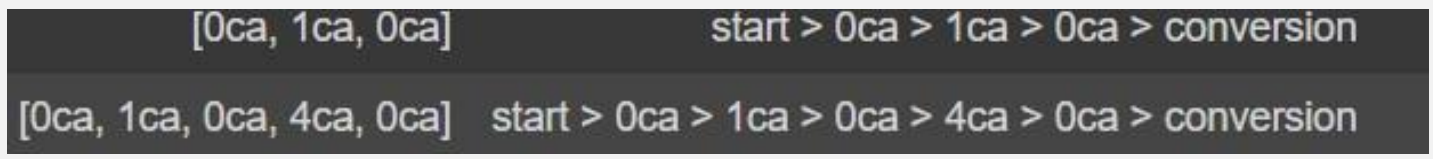

In [79]:
# Step 1: Define the data_processing function
def data_processing(df, maxlength=3, minlength=1):
    # Step 2: Filter the DataFrame based on prod_len
    filtered_df = df[(df['prod_len'] <= maxlength) & (df['prod_len'] >= minlength)].copy()

    # Step 3: Create the 'path' column with the specified transformation
    filtered_df['path'] = 'start > ' + filtered_df['Product_Categories'].apply(lambda x: ' > '.join(x)) + ' > conversion'

    return filtered_df

In [80]:
# Step 4: Run the data_processing function with df_1
df_2 = data_processing(df_1, maxlength=5, minlength=2)

In [81]:
# Step 5: Print the top 10 rows of the new DataFrame df_2
df_2.head(10)

,Product_Categories,Product_Names,prod_len,path
TransactionNo,,,,
536378,"[0ca, 1ca, 0ca]","[JumboBagPinkPolkadot, PackOfPinkPaisleyCakeCa...",3,start > 0ca > 1ca > 0ca > conversion
536395,"[0ca, 1ca, 0ca]","[PackOfPinkPaisleyCakeCases, HotWaterBottleTea...",3,start > 0ca > 1ca > 0ca > conversion
536404,"[0ca, 1ca, 0ca, 4ca, 0ca]","[SetOfGirlsCelebrationCandles, PackOfRetrospot...",5,start > 0ca > 1ca > 0ca > 4ca > 0ca > conversion
536408,"[0ca, 1ca, 0ca]","[DoormatRedRetrospot, AirlineBagVintageTokyo, ...",3,start > 0ca > 1ca > 0ca > conversion
536412,"[0ca, 4ca, 0ca]","[LunchBagDollyGirlDesign, TravelSewingKit, Lun...",3,start > 0ca > 4ca > 0ca > conversion
536415,"[0ca, 1ca, 0ca]","[WickerStar, GinghamHeartDecoration, TvDinnerT...",3,start > 0ca > 1ca > 0ca > conversion
536464,"[0ca, 1ca, 0ca, 1ca, 0ca]","[DiamanteHairGripPackMontana, StarWoodenChrist...",5,start > 0ca > 1ca > 0ca > 1ca > 0ca > conversion
536532,"[0ca, 1ca, 0ca]","[MagicDrawingSlateSpaceboy, PackOfBluePaisleyT...",3,start > 0ca > 1ca > 0ca > conversion
536542,"[4ca, 0ca]","[LunchBagSukiDesign, JumboBagStrawberry, Jumbo...",2,start > 4ca > 0ca > conversion


❓
- Define the data_processing Function:
  - Arguments:
    - df: The input DataFrame.
    - maxlength: Default value set to 3; used to filter transactions with prod_len less than or equal to this value.
    - minlength: Default value set to 1; used to filter transactions with prod_len greater than or equal to this value.
- Filtering the DataFrame:
  - The DataFrame is filtered based on the prod_len column, selecting rows where the length of the product categories is within the specified bounds.
- Transforming the Product_Categories:
  - The path column is created by joining the product categories with the specified format. The apply function uses a lambda function to join the list elements with ' > ' and adds 'start' at the beginning and 'conversion' at the end.
- Run the Function: The data_processing function is executed with df_1, using the specified maxlength and minlength.
- Print the Top 10 Rows: The first 10 rows of the new DataFrame df_2 are printed to check the results.

💡 We Transformed the list in product_category from [productcategory1, productcategory2...] to ‘start > productcategory1 > productcategory2 > ... > conversion’ with new column path. We added ‘start’ as the first element, and ‘conversion’ as the last. Also used ‘ > ’ to connect each of the transition on products (there is a space between the elements and the transition symbol >).

💡 Created a function data_processing to achieve above with three arguments: dataframe, maxlength with default value of 3 and minlength with default value of 1.

💡 We ran defined function with dataframe ‘df_1’, maxlength = 5 and minlength = 2, printed the dataframe ‘df_2’ with top 10 rows.

## ➡️ **Question 1.8**
Continue to work on the results of question 1.7, the dataframe ‘df_2’, we would like to build the transition matrix together, but before we actually conduct the programming, we will need to finish few questions for exploration:

### ⚡ 1.8.1 Check on your transaction level basket with results from question 1.7, could you please find out respectively how many transactions ended with pattern ‘... > 0ca > conversion’ / ‘... > 1ca > conversion’ / ‘... > 2ca > conversion’ / ‘... > 3ca > conversion’ / ‘... > 4ca > conversion’ (1 result for each pattern, total 5 results are expected).


In [82]:
# Now, let's check for the specific patterns in the 'path' column and count the occurrences.
patterns = ['0ca', '1ca', '2ca', '3ca', '4ca']
results = {}

# Count the occurrences of each pattern in the 'path' column
for pattern in patterns:
    results[pattern] = df_2['path'].str.contains(f'> {pattern} > conversion').sum()

results


{'0ca': 3321, '1ca': 49, '2ca': 60, '3ca': 24, '4ca': 38}

💡 The number of transactions that ended with each pattern are as follows:
- '... > 0ca > conversion': 3321 transactions
- '... > 1ca > conversion': 49 transactions
- '... > 2ca > conversion': 60 transactions
- '... > 3ca > conversion': 24 transactions
- '... > 4ca > conversion': 38 transactions

### ⚡ 1.8.2 Check on your transaction level basket with results from question 1.7, could you please find out respectively how many times the transactions contains ‘0ca > 0ca’ / ‘0ca > 1ca’ / ‘0ca > 2ca’ / ‘0ca > 3ca’ / ‘0ca > 4ca’ / ‘0ca > conversion’ in the whole data (1 result for each pattern, total 6 results are expected and each transaction could contain those patterns multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times with pattern ‘0ca > 1ca’, if there is not any, then return 0, you need to sum the counts from each transaction to return the final value).


In [83]:
# Define the patterns to search for
transition_patterns = ['0ca > 0ca', '0ca > 1ca', '0ca > 2ca', '0ca > 3ca', '0ca > 4ca', '0ca > conversion']
transition_results = {}

# Count occurrences of each transition pattern in the 'path' column
for pattern in transition_patterns:
    transition_results[pattern] = df_2['path'].str.count(pattern).sum()

transition_results


{'0ca > 0ca': 0,
 '0ca > 1ca': 1183,
 '0ca > 2ca': 1068,
 '0ca > 3ca': 460,
 '0ca > 4ca': 1161,
 '0ca > conversion': 3321}

💡 Here are the counts for each transition pattern across the transactions:
- '0ca > 0ca': 0 occurrences
- '0ca > 1ca': 1,183 occurrences
- '0ca > 2ca': 1,068 occurrences
- '0ca > 3ca': 460 occurrences
- '0ca > 4ca': 1,161 occurrences
- '0ca > conversion': 3,321 occurrences

### ⚡ 1.8.3 Check on your transaction level basket with results from task question 1.7, could you please find out how many times the transactions contains ‘...> 0ca > ...’ in the whole data (1 result is expected and each transaction could contain the pattern multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times, you need to sum the counts from each transaction to return the final value).

In [84]:
# Define the patterns to search for
transition_patterns2 = [' > 0ca > ']
transition_results2 = {}

# Count occurrences of each transition pattern in the 'path' column
for pattern in transition_patterns:
    transition_results[pattern] = df_2['path'].str.count(pattern).sum()

transition_results


{'0ca > 0ca': 0,
 '0ca > 1ca': 1183,
 '0ca > 2ca': 1068,
 '0ca > 3ca': 460,
 '0ca > 4ca': 1161,
 '0ca > conversion': 3321}

In [85]:
# Step 5: Define a function to count occurrences of ' > 0ca > ' in each path
def count_occurrences(path, pattern=' > 0ca > '):
    return path.count(pattern)

In [86]:
# Step 6: Apply the function to count occurrences for each transaction
total_occurrences = df_2['path'].apply(count_occurrences).sum()
print(f"The total number of times the pattern '> 0ca >' occurs is: {total_occurrences}")

The total number of times the pattern '> 0ca >' occurs is: 7193


###⚡ 1.8.4 Use the 6 results from 1.8.2 to divide the result from 1.8.3 and then sum all of them and return the value.

### **Hint:** you might consider to use endswith and count functions from default python 3

In [87]:
# transition_results dictionary from 1.8.2
transition_results

{'0ca > 0ca': 0,
 '0ca > 1ca': 1183,
 '0ca > 2ca': 1068,
 '0ca > 3ca': 460,
 '0ca > 4ca': 1161,
 '0ca > conversion': 3321}

In [88]:
# total_occurrences from 1.8.3
total_occurrences

7193

❓ Here not sure we have to devide each value of transition_results by total_occurrences or Vice versa and sum up the values as teh sentence is confusing. Calculating both of them with the result1 and result2.

In [89]:
# Initialize a variable to store the sum
result1 = 0

# Iterate over the values in the transition_results dictionary
for value in transition_results.values():
    # Calculate the result for each value and add it to the sum
    if value != 0:
      #print(value / total_occurrences)
      result1 += value / total_occurrences

print(result1)

1.0


In [90]:
# Initialize a variable to store the sum
result2 = 0

# Iterate over the values in the transition_results dictionary
for value in transition_results.values():
    # Calculate the result for each value and add it to the sum
    if value != 0:
      #print(total_occurrences / value)
      result2 += total_occurrences / value

print(result2)

36.813714543263316


## ➡️ **Question 1.9**
Let’s now look at the question 1.6 again, you have the list of product and list of product category for each transaction. We will use the transactionNo and productName_process to conduct the Association rule learning.

### ⚡ 1.9.1 Work on the dataframe df from question 1.2 (filter out the transaction with negative quantity value and also only keep those top 100 products by ranking the sum of quantity) and build the transaction level product dataframe (each row represents transactionNo and productName_process become the columns, the value in the column is the Quantity).

### **Hint:** you might consider to use pivot function in pandas.

In [91]:
# Step 1: Filter out rows where Quantity is negative
df_filtered = df[df['Quantity'] > 0]

# Step 2: Aggregate by 'productName_process' and sum the quantities
product_quantity_sum = df_filtered.groupby('productName_process')['Quantity'].sum()

# Step 3: Rank the products by quantity and select the top 100 products
top_100_products = product_quantity_sum.nlargest(100).index

# Step 4: Filter the original dataframe to only include the top 100 products
df_top_100 = df_filtered[df_filtered['productName_process'].isin(top_100_products)]

# Step 5: Pivot the DataFrame to get the desired transaction-product matrix
df_pivot = df_top_100.pivot_table(index='TransactionNo', columns='productName_process', values='Quantity', fill_value=0)

# Step 6: Review the result
df_pivot.head()


productName_process,AgedGlassSilverTLightHolder,AntiqueSilverTLightGlass,AssortedColourBirdOrnament,AssortedColoursSilkFan,AssortedFlowerColourLeis,AsstdDesigndPaperStickers,BaggSwirlyMarbles,BlackRecordCoverFrame,BrocadeRingPurse,BubblegumRingAssorted,...,StrawberryCharlotteBag,SweetheartFairyCakeCases,TeatimeFairyCakeCases,TravelCardWalletKeepCalm,VictorianGlassHangingTLight,VintageSnapCards,WoodenHeartChristmasScandinavian,WoodenStarChristmasScandinavian,WoodlandCharlotteBag,WorldWarGlidersAsstdDesigns
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


💡 The dataframe df from question 1.2 we filtered out the transaction with negative quantity value. We only only keep those top 100 products by ranking the sum of quantity and build the transaction level product dataframe. We have used pivot function in pandas.

💡 Afetr doing the operation sample records looks as shown above.

### ⚡ 1.9.2 Run the apriori algorithm to identify items with minimum support of 1.5% (only looking at baskets with 4 or more items).

### **Hint:** you might consider to use mlxtend.frequent_patterns to run apriori rules.


In [92]:
#installing the library for appriori
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: df_pivot is the DataFrame with TransactionNo as rows and Products as columns (binary matrix of quantity)

# Step 2: Filter out baskets with fewer than 4 items
df_pivot_filtered = df_pivot[df_pivot.gt(0).sum(axis=1) >= 4]

# Step 3: Convert quantities to binary (1 if purchased, 0 if not)
df_pivot_binary = df_pivot_filtered.applymap(lambda x: 1 if x > 0 else 0)

# Step 4: Run the apriori algorithm with a minimum support of 1.5%
min_support = 0.015  # This is 1.5%

frequent_itemsets = apriori(df_pivot_binary, min_support=min_support, use_colnames=True)

<ipython-input-93-16a86bd7bf28>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pivot_binary = df_pivot_filtered.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Step 5: Display frequent itemsets
frequent_itemsets.head()

In [ ]:
# Step 6: (Optional) Generate association rules based on the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 7: Display association rules
rules.head(10)

💡 We Ran the apriori algorithm to identify items with minimum support of 1.5% (only looking at baskets with 4 or more items).

💡 Top 10 association rules are shown above.

### ⚡ 1.9.3 Run the apriori algorithm to find the items with support >= 1.0% and lift > 10.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: df_pivot_binary is the DataFrame with TransactionNo as rows and Products as columns (binary matrix of quantity)

# Step 2: Run the apriori algorithm with a minimum support of 1.0%
min_support = 0.01  # This is 1.0%

frequent_itemsets = apriori(df_pivot_binary, min_support=min_support, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Step 3: Generate association rules with lift > 10
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=10)

In [ ]:
# Step 4: Display the rules that meet the criteria
rules.head()

💡 Ran the appriori algorithm to find the items with support >= 1.0% and lift > 10.

💡 Above are the sample association rules.

### ⚡ 1.9.4 Please explore three more examples with different support / confidence / lift measurements (you could leverage your rule mining with one of the three measurements or all of them) to find out any of the interesting patterns from the Association rule learning. Save your code and results in a clean and tidy format and writing down your insights.

In [ ]:
# Run Apriori with minimum support of 0.05 (5%)
min_support_1 = 0.05
frequent_itemsets_1 = apriori(df_pivot_binary, min_support=min_support_1, use_colnames=True)

# Generate association rules with confidence >= 0.80
rules_1 = association_rules(frequent_itemsets_1, metric="confidence", min_threshold=0.80)

# Save results
rules_1.to_csv('rules_example_1.csv', index=False)


In [ ]:
# Run Apriori with minimum support of 0.07 (7%)
min_support_2 = 0.07
frequent_itemsets_2 = apriori(df_pivot_binary, min_support=min_support_2, use_colnames=True)

# Generate association rules with lift > 10
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=10)

# Save results
rules_2.to_csv('rules_example_2.csv', index=False)


In [ ]:
# Run Apriori with minimum support of 0.03 (3%)
min_support_3 = 0.03
frequent_itemsets_3 = apriori(df_pivot_binary, min_support=min_support_3, use_colnames=True)

# Generate association rules with confidence >= 0.60
rules_3 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=0.60)

# Save results
rules_3.to_csv('rules_example_3.csv', index=False)


## ➡️ **Question 1.10**
After we finished the Association rule learning, it is a time for us to consider to do customer analysis based on their shopping behaviours.

### ⚡ 1.10.1 Work on the dataframe df from question 1.2 and build the customer product dataframe (each row represents single customerNo and productName_process become as the columns, the value in the columns is the aggregated Quantity value from all transactions and the result is a N by M matrix where N is the number of distinct customerNo and M is the number of distinct productName_process. Please filter out the transaction with negative quantity value and also only keep those top 100 product by ranking the sum of quantity).

In [ ]:
import pandas as pd

# Step 1: Filter out rows with negative quantity
df_filtered = df[df['Quantity'] > 0]

# Step 2: Calculate the sum of quantities for each product and select top 100 products
top_100_products = (
    df_filtered.groupby('productName_process')['Quantity'].sum()
    .sort_values(ascending=False).head(100).index
)

# Step 3: Filter the dataframe to only keep transactions for top 100 products
df_top_products = df_filtered[df_filtered['productName_process'].isin(top_100_products)]

# Step 4: Pivot the dataframe to create the customer-product matrix
customer_product_matrix = df_top_products.pivot_table(
    index='CustomerNo',            # Rows: Customer ID
    columns='productName_process', # Columns: Product name
    values='Quantity',             # Values: Aggregated quantity
    aggfunc='sum',                 # Aggregation function: sum of quantities
    fill_value=0                   # Fill missing values with 0
)

# Display the resulting customer-product matrix
customer_product_matrix.head()


### ⚡ 1.10.2 Use the customer-product dataframe, let’s calculate the Pairwise Euclidean distance on customer level (you will need to use the product Quantity information on each customer to calculate the Euclidean distance for all other customers and the result is a N by N matrix where N is the number of distinct customerNo).

In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Step 1: Assuming `customer_product_matrix` is already created from the previous steps
# It is an N x M matrix where N = number of customers and M = number of products

# Step 2: Calculate the pairwise Euclidean distance between all customers
distances = pdist(customer_product_matrix, metric='euclidean')

# Step 3: Convert the condensed distance matrix into a square form (N x N matrix)
distance_matrix = squareform(distances)

# Step 4: Convert the distance matrix into a DataFrame for easier interpretation
distance_df = pd.DataFrame(distance_matrix, index=customer_product_matrix.index, columns=customer_product_matrix.index)

# Display the resulting pairwise distance matrix
distance_df.head()


### ⚡ 1.10.3 Use the customer Pairwise Euclidean distance to find out the top 3 most similar customer to CustomerNo == 13069 and CustomerNo == 17490.

In [ ]:
# Step 1: Extract distances for CustomerNo == 13069 and CustomerNo == 17490
distances_13069 = distance_df.loc[13069].sort_values()
distances_17490 = distance_df.loc[17490].sort_values()

# Step 2: Exclude the customer themselves (distance = 0) and select the top 3
top_3_customers_13069 = distances_13069[distances_13069 > 0].head(3)
top_3_customers_17490 = distances_17490[distances_17490 > 0].head(3)

# Display the results
print("Top 3 most similar customers to CustomerNo 13069:")
print(top_3_customers_13069)

print("\nTop 3 most similar customers to CustomerNo 17490:")
print(top_3_customers_17490)


### ⚡ 1.10.4 For the customer CustomerNo == 13069, you could see there are some products that this customer has never shopped before, could you please give some suggestions on how to recommend these product to this customer? please write down your suggestions and provide a coding logic (steps on how to achieve, not actual code).

To recommend products that CustomerNo 13069 has never purchased before, we can use collaborative filtering methods, leveraging the similarities between customers and their purchase histories. Here are a few approaches to consider:

1. Item-Based Collaborative Filtering
This approach uses the purchase patterns of similar customers (those identified through the pairwise Euclidean distance matrix) to recommend products that the target customer hasn’t purchased yet. The logic is that if similar customers (based on their shopping patterns) have bought certain products, those products may be of interest to the target customer.

Steps:
Identify Similar Customers: Use the pairwise Euclidean distance results to find the top 3 or 5 most similar customers to CustomerNo 13069 (already computed in the previous step).

Aggregate Product Purchases of Similar Customers: Look at the product quantities purchased by these similar customers. For each product that CustomerNo 13069 hasn’t purchased, aggregate the total quantity purchased by the similar customers.

Rank Products: Rank the products by the total quantity purchased by the similar customers (from highest to lowest).

Recommend Top Products: Recommend the top N products (e.g., top 5 or 10) that CustomerNo 13069 has not purchased yet.

Recommendation Logic:
If CustomerNo 13069’s similar customers have purchased certain products frequently but CustomerNo 13069 has not, these products are likely candidates for recommendation.
2. Product Popularity Among Similar Customers
Another method is to recommend products based on the overall popularity of products among the similar customers. This involves recommending the most frequently purchased products (in terms of number of distinct customers who bought them), rather than simply those purchased in large quantities.

Steps:
Find Products Not Purchased by CustomerNo 13069: Create a list of products that CustomerNo 13069 hasn’t purchased by checking for zero quantities in their customer-product matrix row.

Analyze Product Popularity: For these products, calculate the number of similar customers who have purchased each product (i.e., count how many distinct similar customers have purchased the product).

Rank Products by Popularity: Rank the unpurchased products by the number of distinct customers who bought them.

Recommend Top Products: Recommend the most popular products that CustomerNo 13069 has not yet purchased.

3. Market Basket Analysis
Use association rules generated by the Apriori algorithm to suggest products that are often bought together with products CustomerNo 13069 has already purchased. The logic here is that if CustomerNo 13069 has bought certain products, they might be interested in items that are frequently bought together with those products by other customers.

Steps:
Identify Products Purchased by CustomerNo 13069: Find out which products CustomerNo 13069 has already purchased.

Run Association Rule Mining: Use association rule mining (Apriori algorithm) to identify products frequently bought together with the products CustomerNo 13069 has purchased.

Filter Rules: Filter out products that CustomerNo 13069 has already bought, leaving only the products they haven’t purchased yet.

Recommend Associated Products: Recommend the top products that are frequently associated with the products CustomerNo 13069 has purchased.

4. Matrix Factorization (Latent Factor Model)
Another approach is to use matrix factorization techniques (like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS)) for product recommendation. This method reduces the customer-product matrix into latent factors that capture hidden relationships between customers and products.

Steps:
Construct Customer-Product Matrix: Use the customer-product matrix from previous steps as input.

Decompose Matrix: Perform matrix factorization (e.g., SVD) to reduce the matrix to latent factors representing customer and product preferences.

Predict Missing Values: For each product that CustomerNo 13069 has not purchased, predict the likely quantity or rating using the latent factors.

Recommend Products: Recommend the top products with the highest predicted values that CustomerNo 13069 hasn’t purchased yet.

5. Content-Based Filtering
While the previous methods focus on customer behavior, content-based filtering uses product attributes to recommend items. If CustomerNo 13069 tends to buy certain types of products (e.g., from specific categories or with specific price ranges), we can recommend products with similar attributes.

Steps:
Identify Products Purchased by CustomerNo 13069: Analyze the product attributes of items they have purchased, such as Product_category, Price, or product descriptions.

Find Similar Products: Identify other products that share similar attributes but have not yet been purchased by CustomerNo 13069.

Recommend Products: Recommend products with the highest similarity based on attributes like category, price range, or product features.

Example of Collaborative Filtering (Step-by-Step Logic):
Retrieve Similar Customers: Use the Euclidean distance matrix to find the top 3 or 5 similar customers to CustomerNo 13069.
Products Purchased by Similar Customers: Aggregate the product quantities purchased by these similar customers.
Products Not Purchased by 13069: Identify products that CustomerNo 13069 has not purchased (filter out products where their quantity is 0).
Rank Products: Rank the unpurchased products by the total quantity purchased by the similar customers.
Top Product Recommendations: Recommend the top N products based on the highest total purchase quantity by similar customers.
Conclusion:
Each of these methods can help in building a recommendation engine tailored to CustomerNo 13069. For simplicity, collaborative filtering methods like item-based collaborative filtering and association rule mining are often easy to implement and provide good results. Advanced models like matrix factorization may provide more personalized recommendations based on latent factors in customer-product interactions.

# ✴️ **Part II**
# 👨🏻‍💼 **Sales Prediction**

There are **3** questions in this part, totaling **40** marks. Each question is worth **10** marks. Additionally, the quality of your explanation in both the report and video will collectively be worth **10**| marks.

You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.

In this part, we will focus only on two columns revenue with transaction_date to form the revenue time series
based on transaction_date. We will use the dataframe df from question 1.2 (without any filtering on
transactions) to finish below sub-tasks:

## ➡️ **Question 2.1**
You are required to explore the revenue time series. There are some days not available in the revenue time series such as 2019-01-01. Please add those days into the revenue time series with default revenue value with the mean value of the revenue in the whole data (without any filtering on transactions).

After that, decompose the revenue time series with addictive mode and analyses on the results to find if there is any seasonality pattern (you could leverage the M05A material from lab session with default setting in seasonal_decompose function).

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Convert transaction_date to DateTime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Step 2: Group by transaction_date to get daily revenue
daily_revenue = df.groupby('transaction_date')['Revenue'].sum()

# Step 3: Create a full date range from min to max date in the data
full_date_range = pd.date_range(start=daily_revenue.index.min(), end=daily_revenue.index.max())

# Step 4: Reindex the daily revenue series to include all days, filling missing days with NaN
daily_revenue_full = daily_revenue.reindex(full_date_range, fill_value=np.nan)

# Step 5: Calculate the mean revenue to fill missing values
mean_revenue = daily_revenue.mean()

# Step 6: Fill NaN values (missing days) with the mean revenue
daily_revenue_full_filled = daily_revenue_full.fillna(mean_revenue)

# Step 7: Decompose the time series using additive decomposition
result = seasonal_decompose(daily_revenue_full_filled, model='additive', period=7)

# Step 8: Plot the decomposition result
result.plot()
plt.show()

# Below is the weekly seasonality

In [ ]:
# Below is the monthly seasonality
result = seasonal_decompose(daily_revenue_full_filled, model='additive', period=30)

# Step 8: Plot the decomposition result
result.plot()
plt.show()

## ➡️ **Question 2.2**
We will try to use time series model ARIMA for forecasting the future. you need to find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Absolute Error from 27 choices based on the time from ”Jan-01-2019” to ”Nov-01-2019” (you might need to split the time series to train and test with grid search according to the M05B material).

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import itertools

# Assuming `daily_revenue_full_filled` is the time series data with dates and revenue filled as per previous steps
# Step 1: Filter data for the period Jan-01-2019 to Nov-01-2019
data = daily_revenue_full_filled['2019-01-01':'2019-11-01']

# Step 2: Split into training (Jan 1 to Sep 30) and test set (Oct 1 to Nov 1)
train = data[:'2019-09-30']
test = data['2019-10-01':'2019-11-01']

# Step 3: Initialize p, d, q ranges and combinations of them
p = d = q = range(0, 3)  # p, d, q values in [0, 1, 2]
pdq = list(itertools.product(p, d, q))

# Step 4: Grid Search - Iterate over all pdq combinations to find the best model based on MAE
best_mae = float('inf')
best_order = None
results = []

for order in pdq:
    try:
        # Step 5: Fit the ARIMA model
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        # Step 6: Forecast on test set
        predictions = model_fit.forecast(steps=len(test))

        # Step 7: Calculate MAE
        mae = mean_absolute_error(test, predictions)
        results.append((order, mae))

        # Step 8: Track the best performing model
        if mae < best_mae:
            best_mae = mae
            best_order = order
    except Exception as e:
        # Ignore models that fail to converge
        continue

# Step 9: Output the best ARIMA model
print(f'Best ARIMA order: {best_order} with MAE: {best_mae}')

# Optional: Fit and display the best model
best_model = ARIMA(train, order=best_order)
best_model_fit = best_model.fit()

# Plot forecast vs actual test values
test_predictions = best_model_fit.forecast(steps=len(test))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, test_predictions, label='Predicted')
plt.title(f'Best ARIMA{best_order} Predictions vs Actual')
plt.legend()
plt.show()


## ➡️ **Question 2.3**
There are many deep learning time series forecasting methods, could you please explore those methods and write down the necessary data wrangling and modeling steps (steps on how to achieve, not actual code). Also please give the reference of the deep learning time series forecasting models you are using.

Deep learning methods have shown great promise in time series forecasting tasks, especially for capturing complex patterns and non-linear relationships. Below, I will outline the common deep learning models for time series forecasting, the necessary data wrangling steps, and the modeling approach. These models include RNN (Recurrent Neural Networks), LSTM (Long Short-Term Memory), GRU (Gated Recurrent Units), CNN (Convolutional Neural Networks), and Transformer-based models.

1. Data Wrangling for Deep Learning Time Series Forecasting
Before applying deep learning models, data needs to be transformed appropriately. Time series data requires specific preprocessing steps:

Data Wrangling Steps:
Missing Value Imputation:

Ensure there are no missing values. If any are missing, use techniques like forward fill, backward fill, or interpolation to impute them. For deep learning models, continuous and complete data is important.
Normalization/Standardization:

Normalize or standardize the data to bring all features into the same scale, usually between 0 and 1 or standardized with mean 0 and standard deviation 1. This is crucial for deep learning models to ensure faster convergence and more accurate training.
Example: MinMaxScaler or StandardScaler from sklearn.
Windowing (Sliding Window):

Deep learning models (especially RNNs, LSTMs, etc.) require sequential input data. Transform the time series into sequences using a sliding window approach. For example, create sequences of fixed length (e.g., 30 days) that serve as input, and use the subsequent point as the target.
Example: If the window is 30 days, the model will predict the 31st day based on the first 30 days.
Train-Test Split:

Split the data into training, validation, and test sets. Ensure that no future data leaks into the past when making splits (i.e., preserve the time series order).
Typically, 70-80% of the data is used for training, and the remaining for testing/validation.
Reshape Input Data:

Depending on the model, the input needs to be reshaped appropriately. For example, LSTMs expect input in the format [samples, time_steps, features]. If there’s only one feature (e.g., revenue), this will be [samples, time_steps, 1].
Handling Multivariate Data (if applicable):

If there are additional exogenous variables (e.g., external factors like holidays or weather), they can be included in the model. In this case, each time step will have multiple features (e.g., [samples, time_steps, n_features]).
2. Deep Learning Models for Time Series Forecasting
A. Recurrent Neural Networks (RNN)
RNNs are designed to handle sequential data, making them suitable for time series forecasting. They suffer from vanishing gradient problems in long sequences but work well for shorter patterns.

Modeling Steps for RNN:
Preprocess data using windowing to create sequences.
Use an RNN layer to capture the temporal dependencies in the data.
Stack RNN layers or combine them with dense layers.
Apply techniques like dropout or L2 regularization to prevent overfitting.
Train the model using a loss function like Mean Squared Error (MSE).
Reference:

Lipton, Z. C., Berkowitz, J., & Elkan, C. (2015). A critical review of recurrent neural networks for sequence learning. arXiv preprint arXiv:1506.00019.
B. Long Short-Term Memory (LSTM)
LSTMs are an improvement over RNNs, addressing the vanishing gradient issue by incorporating memory cells. They are very popular for time series forecasting due to their ability to remember long-term dependencies.

Modeling Steps for LSTM:
Preprocess data and reshape into [samples, time_steps, features].
Use one or more LSTM layers to learn temporal dependencies.
Optionally, stack LSTM layers for better performance.
Use an activation function like tanh or relu.
Train with optimization algorithms like Adam, and use MSE for the loss function.
Tune hyperparameters like the number of LSTM units, dropout rates, and batch size.
Reference:

Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.
C. Gated Recurrent Unit (GRU)
GRUs are similar to LSTMs but have fewer parameters, which makes them faster to train. They perform well in capturing sequential data but are slightly less powerful than LSTMs in capturing long-term dependencies.

Modeling Steps for GRU:
Similar to LSTM steps, except replacing LSTM layers with GRU layers.
Use GRU for time series forecasting where faster training is preferred.
Reference:

Cho, K., et al. (2014). Learning phrase representations using RNN encoder-decoder for statistical machine translation. arXiv preprint arXiv:1406.1078.
D. Convolutional Neural Networks (CNN)
CNNs are not traditionally used for time series, but 1D CNNs have shown promise for time series forecasting by capturing local patterns. CNNs can be combined with RNNs or LSTMs for hybrid models.

Modeling Steps for CNN:
Apply a 1D CNN to the time series, which applies filters to capture patterns in the data.
Use several convolutional layers with filters and pooling layers.
Combine with fully connected layers or an RNN/LSTM for sequential learning.
Train using MSE loss and Adam optimizer.
Reference:

Borovykh, A., Bohte, S., & Oosterlee, C. W. (2017). Conditional time series forecasting with convolutional neural networks. arXiv preprint arXiv:1703.04691.
E. Transformer-based Models
Transformers are the latest innovation in time series forecasting. They leverage self-attention mechanisms to focus on different parts of the sequence, making them very effective for long-term forecasting.

Modeling Steps for Transformers:
Use the transformer encoder architecture that processes time series in parallel.
Attention mechanisms are used to focus on relevant past information.
Apply positional encoding to incorporate the time element in the sequence.
Use dense layers for forecasting future values.
Train using MSE or MAE loss, and optimizers like Adam.
Reference:

Vaswani, A., et al. (2017). Attention is all you need. Advances in neural information processing systems, 30.
F. Hybrid Models (LSTM + CNN)
Hybrid models like CNN-LSTM combine the strengths of both CNNs and LSTMs. CNN layers are used for extracting short-term patterns, while LSTM layers capture long-term dependencies.

Modeling Steps for Hybrid Model:
First, apply a 1D CNN to extract local features.
Feed the output of the CNN into an LSTM to capture temporal dependencies.
Stack dense layers on top for final predictions.
Train with MSE loss and the Adam optimizer.
Reference:

Cao, J., & Wang, Z. (2017). Hybrid model of convolutional neural network and long short-term memory for time series prediction. arXiv preprint arXiv:1712.04741.
3. Evaluation Metrics and Model Selection
After building the models, use appropriate metrics like:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Cross-validate the models and use validation sets to prevent overfitting. Once the best model is found, evaluate it on the test set and use it for forecasting.

References:
Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.
Vaswani, A., et al. (2017). Attention is all you need. Advances in neural information processing systems, 30.
Borovykh, A., Bohte, S., & Oosterlee, C. W. (2017). Conditional time series forecasting with convolutional neural networks. arXiv preprint arXiv:1703.04691.
Cho, K., et al. (2014). Learning phrase representations using RNN encoder-decoder for statistical machine translation. arXiv preprint arXiv:1406.1078.
Lipton, Z. C., Berkowitz, J., & Elkan, C. (2015). A critical review of recurrent neural networks for sequence learning. arXiv preprint arXiv:1506.00019.